# Fashion mnist using keras

# Import libraries

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
# download fashion mnist dataset using keras.
from tensorflow.keras import datasets

In [2]:
# setting random seed so that initial value of random variable will be the same

In [3]:
from numpy.random import seed
seed(42)

In [4]:
# get fashion mnist data

In [5]:
fashion_mnist_dataset = datasets.fashion_mnist
(train_images_dataset, train_labels), (test_images_dataset, test_labels) = fashion_mnist_dataset.load_data()

In [7]:
# list of unique categories in fashion mnist
categories = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
# dimensions of training data
print("dimensions of training data: {shape}".format(shape=train_images_dataset.shape))
print("dimensions of training data: {shape}".format(shape=train_labels.shape))

# dimensions of test set
print("dimensions of test set: {shape}".format(shape=test_images_dataset.shape))
print("dimensions of test set: {shape}".format(shape=test_labels.shape))

dimensions of training data: (60000, 28, 28)
dimensions of training data: (60000,)
dimensions of test set: (10000, 28, 28)
dimensions of test set: (10000,)


In [9]:
# preprocessing (standardization) dataset
train_data_mean = np.mean(train_images_dataset[0])
train_data_stdev = np.std(train_images_dataset[0])
train_data = (train_images_dataset - train_data_mean)/train_data_stdev
test_data = (test_images_dataset - train_data_mean)/train_data_stdev

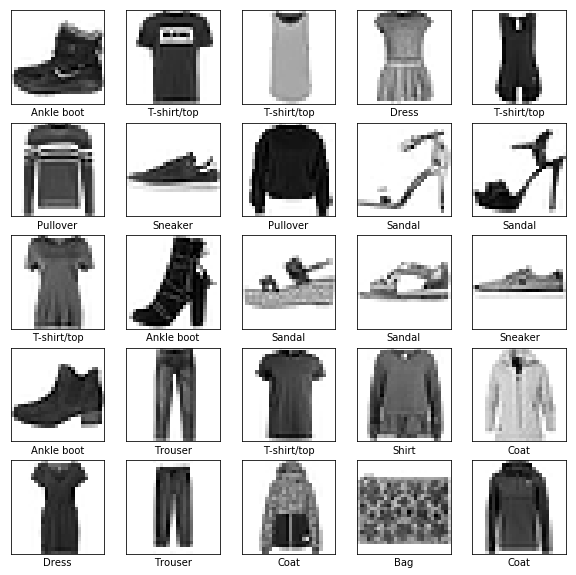

In [10]:
# diplay random images from training dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_dataset[i], cmap=plt.cm.binary)
    plt.xlabel(categories[train_labels[i]])
plt.show()

# build model

In [ ]:
#we can chnage the no. of layers, hidden units toparamet

In [12]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer='RandomNormal', bias_initializer='RandomNormal'))
model.add(keras.layers.Dense(64, activation=tf.nn.relu, kernel_initializer='RandomNormal', bias_initializer='RandomNormal'))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))

In [14]:
model.compile(optimizer=keras.optimizers.Adam(lr = 0.0004), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model_training = model.fit(train_data, train_labels, epochs=8, validation_split=0.05)

Train on 57000 samples, validate on 3000 samples
Epoch 1/8
57000/57000 [==============================] - 8s 135us/sample - loss: 0.4908 - acc: 0.8247 - val_loss: 0.3868 - val_acc: 0.8573
Epoch 2/8
57000/57000 [==============================] - 8s 135us/sample - loss: 0.3652 - acc: 0.8667 - val_loss: 0.3427 - val_acc: 0.8753
Epoch 3/8
57000/57000 [==============================] - 8s 140us/sample - loss: 0.3268 - acc: 0.8791 - val_loss: 0.3330 - val_acc: 0.8713
Epoch 4/8
57000/57000 [==============================] - 8s 142us/sample - loss: 0.3009 - acc: 0.8891 - val_loss: 0.3351 - val_acc: 0.8733
Epoch 5/8
57000/57000 [==============================] - 8s 140us/sample - loss: 0.2809 - acc: 0.8960 - val_loss: 0.3131 - val_acc: 0.8897
Epoch 6/8
57000/57000 [==============================] - 8s 142us/sample - loss: 0.2638 - acc: 0.9021 - val_loss: 0.2991 - val_acc: 0.8913
Epoch 7/8
57000/57000 [==============================] - 8s 142us/sample - loss: 0.2512 - acc: 0.9062 - val_loss: 0.3

In [16]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 43us/sample - loss: 0.3279 - acc: 0.8851
Test accuracy: 0.8851


In [17]:
print(model_training.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


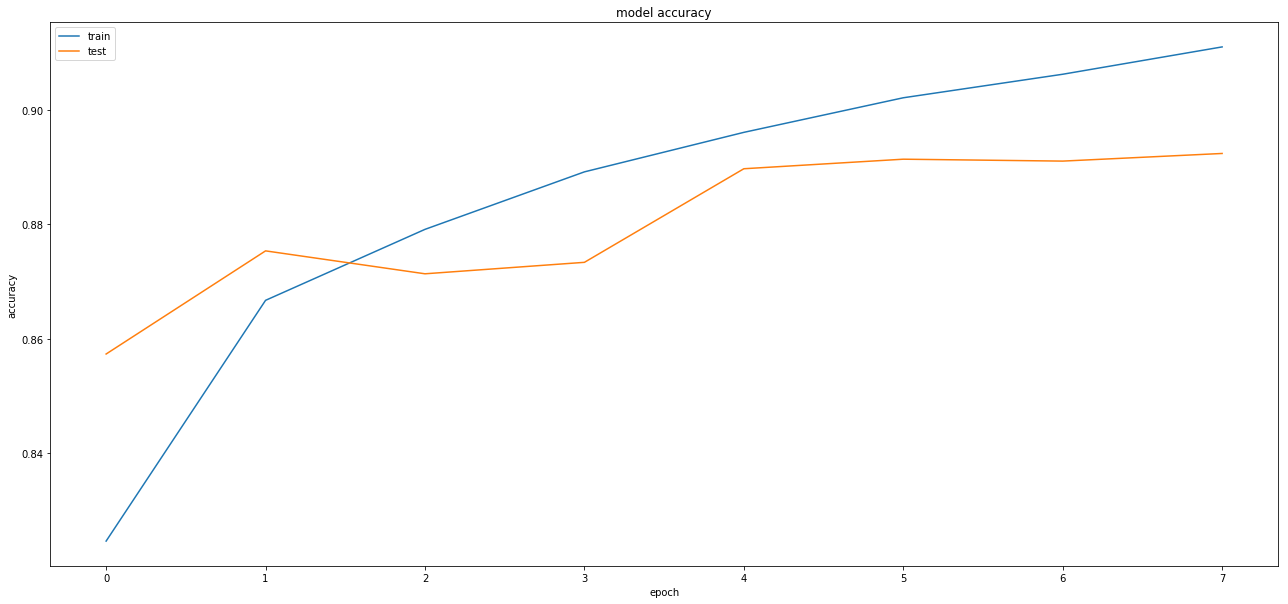

In [18]:
plt.figure(figsize=(22, 10))
plt.plot(model_training.history['acc'])
plt.plot(model_training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

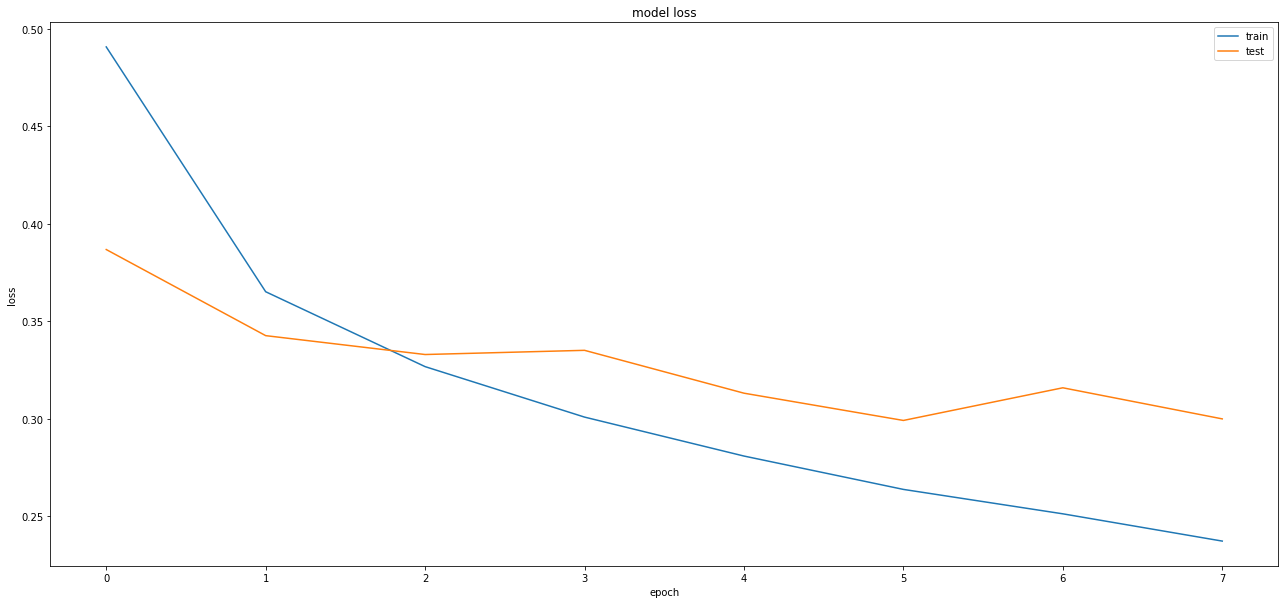

In [19]:
plt.figure(figsize=(22, 10))
plt.plot(model_training.history['loss'])
plt.plot(model_training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# save the model

# Method 1: save model and architecture to single file

In [20]:
model.save('fashion_mnist_nn_keras_model.h5')

In [21]:
from tensorflow.keras.models import load_model

In [23]:
loaded_model = load_model('fashion_mnist_nn_keras_model.h5')

In [24]:
loaded_model.evaluate(test_data, test_labels)

10000/10000 [==============================] - 1s 51us/sample - loss: 0.3279 - acc: 0.8851


[0.32792065045833585, 0.8851]

# Method 2: save model and architecture separately into different files

In [25]:
import json
from tensorflow.keras.models import model_from_json

In [26]:
model_json = model.to_json(indent=4)
with open('fashion_mnist_nn_keras_model.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('fashion_mnist_nn_keras_json_model.h5')

In [27]:
json_file = open('fashion_mnist_nn_keras_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights('fashion_mnist_nn_keras_json_model.h5')
 
# evaluate loaded model on test data
# loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
loaded_model.compile(optimizer=keras.optimizers.Adam(lr = 0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
loaded_model.evaluate(test_data, test_labels)

10000/10000 [==============================] - 1s 57us/sample - loss: 0.3279 - acc: 0.8851


[0.32792065045833585, 0.8851]